# Exercise 04

This <a href="https://www.evaluationengineering.com/home/article/13000306/filters-eliminate-the-aliasing-phenomenon">article</a> introduces a simple way to remove aliasing. Implement the method in the article and show the results by the modified triangle wave. The spectrum of the correct answer is shown in the following figure.

<img src="dealiasing.png">

In [26]:
import sys
sys.path.append('../ThinkDsp')
import thinkdsp

In [27]:
def half_framerate(w):
    fr = w.framerate/2
    l = round(len(w.ys)/2)
    ys = [0.0]*l
    ts = [0.0]*l
    for i in range(l):
        ys[i] = w.ys[i*2]
        ts[i] = w.ts[i*2]
    w2 = thinkdsp.Wave(ys,ts,fr)
    return(w2)

In [28]:
wave = thinkdsp.read_wave("triangle_mod_200Hz.wav")
sp = wave.make_spectrum()

Implement the method here:

In [29]:
sp.low_pass(cutoff=2500)

In [30]:
w = sp.make_wave()         # convert the spectrum to wave
w2 = half_framerate(w)     # reduce the framerate
w2.make_audio()

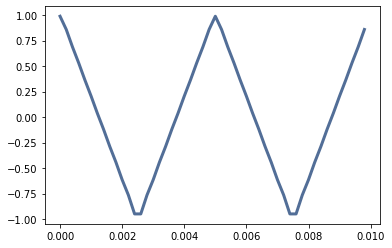

In [31]:
seg = w2.segment(0,0.01)
seg.plot()

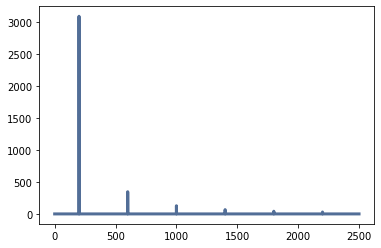

In [32]:
sp2 = w2.make_spectrum()
sp2.plot()